# Sparse Modeling (Ridge, LASSO, Elastic net)

## Bias and Variance Trade-off
We need to optimize number of variable (variable selection).  
With fewer variables, it is difficult to get high accuracy for both training set and test set. With too many variables, we expect to get higher accuracy for training set, but get lower accuracy for test set.
![Bias_Variance_Trade-off2](Bias_Variance_Trade-off2.png)

Reference  
[SlideShare](https://www.slideshare.net/ShinyaShimizu/ss-11623505)  
[Dr.Scott Fortmann' Essays](http://scott.fortmann-roe.com/docs/BiasVariance.html)

Reference  
[Dr.Joseph E. Gonzalez's lecture note in UC Berkeley](https://people.eecs.berkeley.edu/~jegonzal/assets/slides/linear_regression.pdf)

## How to suppress model complexity?
One way to suppress a model complexity is to restrict value of regression coefficient (or weight).  
When a complexity of model is too high, regression coefficients tend to become higher.  
So if we restrict value of coefficient small, we expect to get simpler model.

Lasso (L1 Regularization), Ridge(L2 Regularization) and Elastic net are regression model with which we can restrict value of coefficient.  
In these models we try to get coefficient values with which we get both smaller error and smaller coefficient values.  
  
Regression coefficients of each model can be get by algorisms as below.  
  
### Lasso regression (L1 Regularization)  
$$
\beta_{Lasso} = argmin_{\beta}\left[(y - X\beta)^T (y-X\beta) + \lambda \sum_{j=1}^{p}|\beta_j| \right]
$$
  
### Ridge regression (L2 Regularization)  
$$
\beta_{Ridge} = argmin_{\beta}\left[(y - X\beta)^T (y-X\beta) + \lambda \sum_{j=1}^{p}\beta_j^2 \right]
$$

### Elastic net regression  
$$
\beta_{Elastic Net} = argmin_{\beta}\left[(y - X\beta)^T (y-X\beta) + \sum_{j=1}^{p} ( \lambda|\beta_j| + (1 - \lambda) \beta_j^2 )\right]
$$

![Lasso_Ridge](Lasso_Ridge.png)


Reference  
[tekenuko's blog](http://tekenuko.hatenablog.com/entry/2017/11/18/214317)  
[Dr.Takashi J. OZAKI's blog](https://tjo.hatenablog.com/entry/2015/03/03/190000)

In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
pd.set_option("display.max_rows", 10)

/Users/takumkawahara/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df['Dammy1'] = np.array(range(len(df))) * 0.01
df['Dammy2'] = np.array(range(len(df))) * 0.1
df['Dammy3'] = np.array(range(len(df))) * 1
df['Dammy4'] = np.array(range(len(df))) * 2
df['Dammy5'] = np.array(range(len(df))) * 4
df['Dammy6'] = np.array(range(len(df))) * 8
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Dammy1,Dammy2,Dammy3,Dammy4,Dammy5,Dammy6
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0.00,0.0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0.01,0.1,1,2,4,8
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,0.02,0.2,2,4,8,16
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0.03,0.3,3,6,12,24
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,0.04,0.4,4,8,16,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,5.01,50.1,501,1002,2004,4008
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,5.02,50.2,502,1004,2008,4016
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,5.03,50.3,503,1006,2012,4024
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,5.04,50.4,504,1008,2016,4032


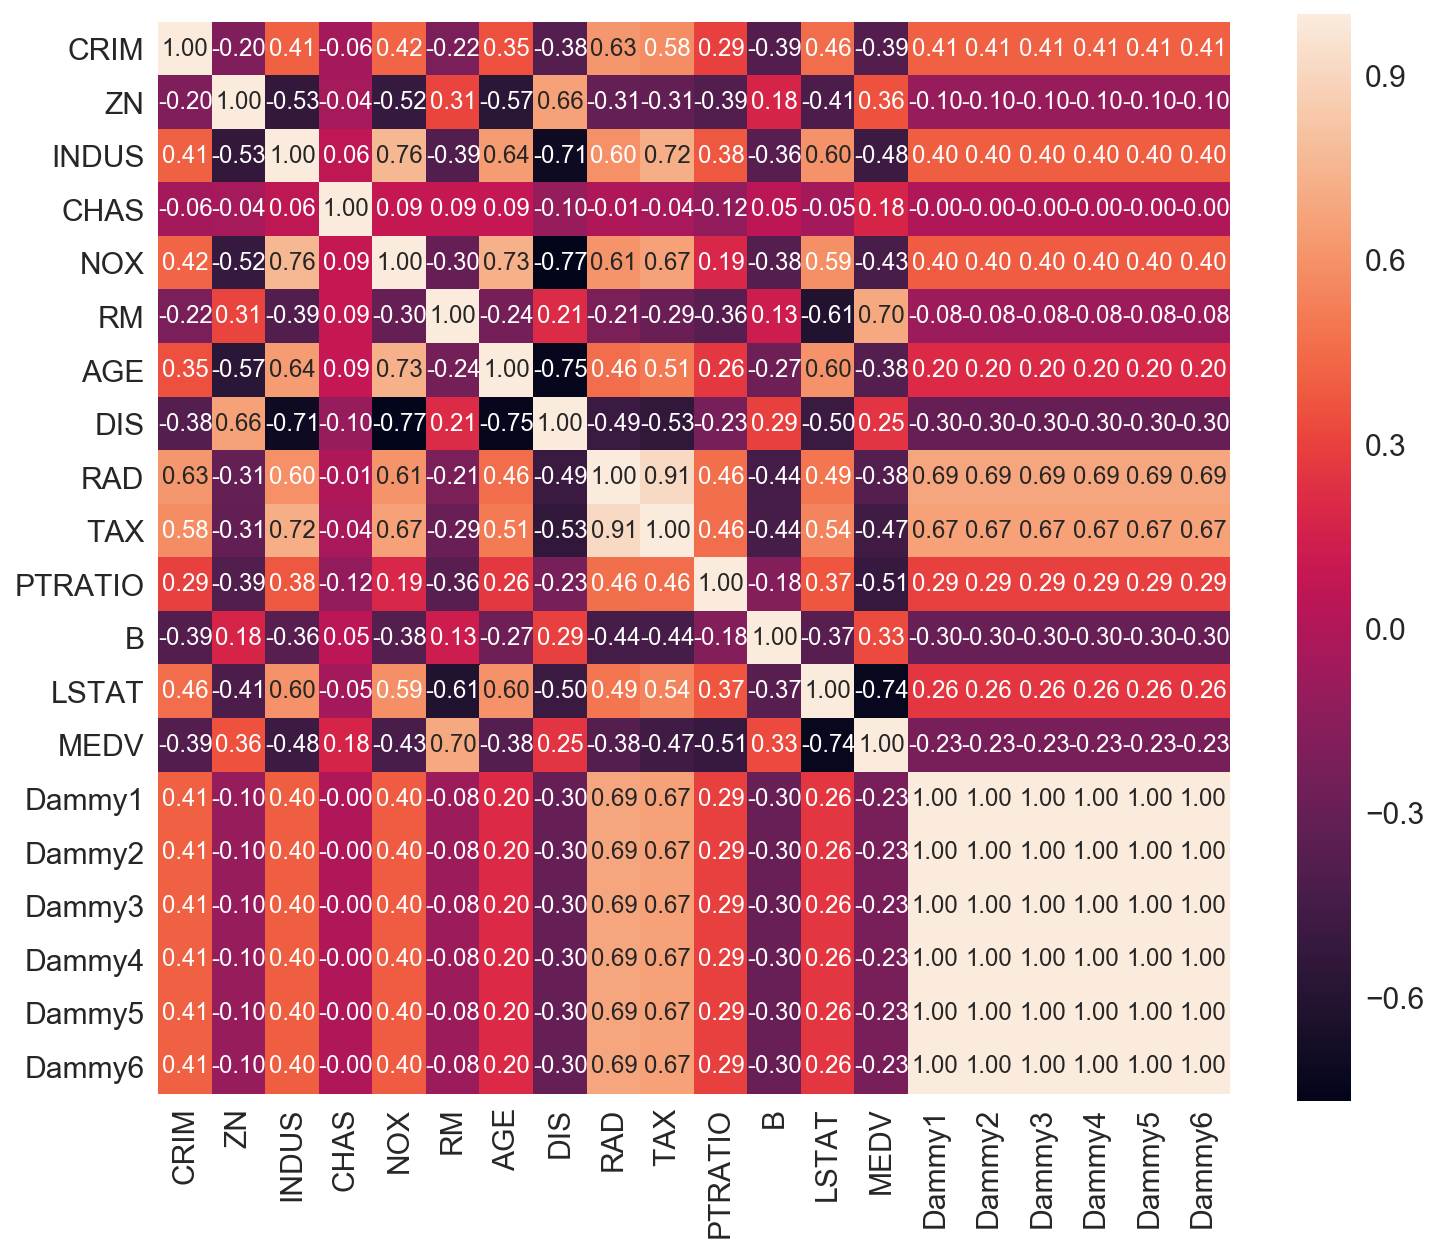

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV','Dammy1','Dammy2','Dammy3','Dammy4','Dammy5','Dammy6']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
plt.subplots(figsize=(12,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=cols, xticklabels=cols)
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path


In [32]:
y = df['MEDV'].values
X = df.drop('MEDV', axis=1).values

In [86]:
eps = 1e-12  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)
print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps, positive=True, fit_intercept=False)

Computing regularization path using the lasso...
Computing regularization path using the positive lasso...


(-5.2343089092387469,
 7.9656910907612541,
 -2.9193493073419607,
 3.1483213166620598)

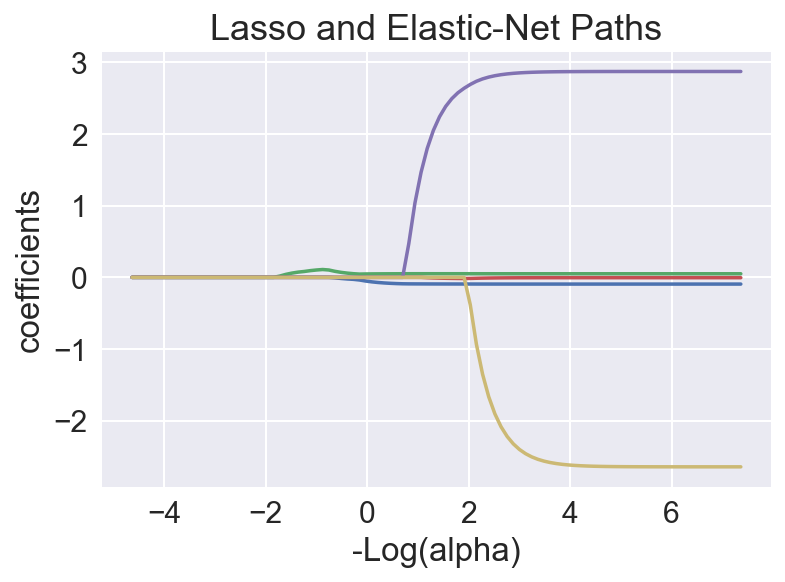

In [108]:
plt.figure(1)
ax = plt.gca()
#ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T[:,0:5])
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.axis('tight')


In [112]:
X_cname = df.drop('MEDV', axis=1).columns.values

(-5.2343089092387469,
 7.9656910907612541,
 -3.0735977545153039,
 6.3875387073022667)

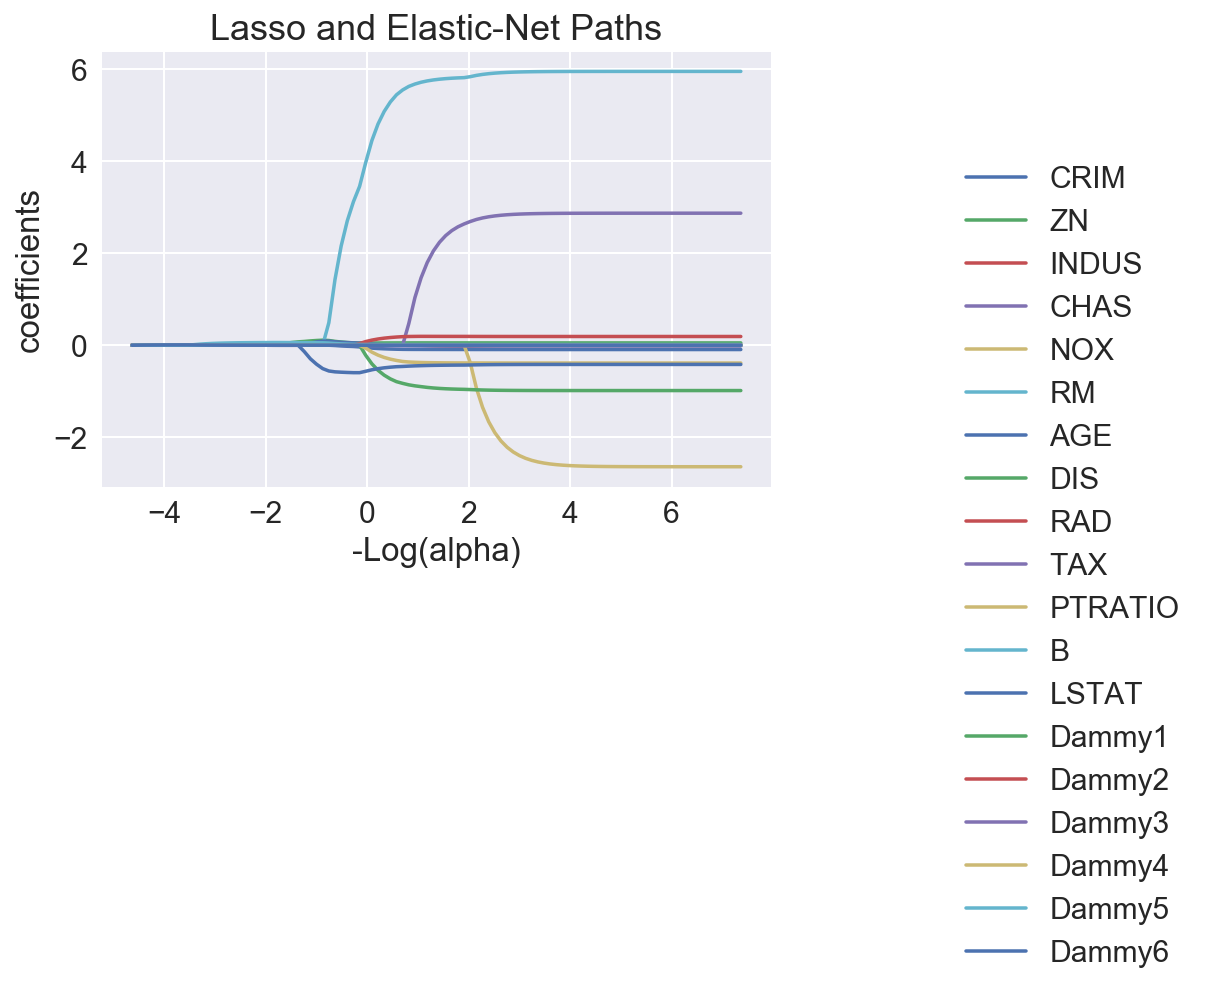

In [126]:
plt.figure(1)
ax = plt.gca()
#ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
for i in range(len(X_cname)):
    plt.plot(-np.log10(alphas_lasso), coefs_lasso.T[:,i], label=X_cname[i])
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.axis('tight')


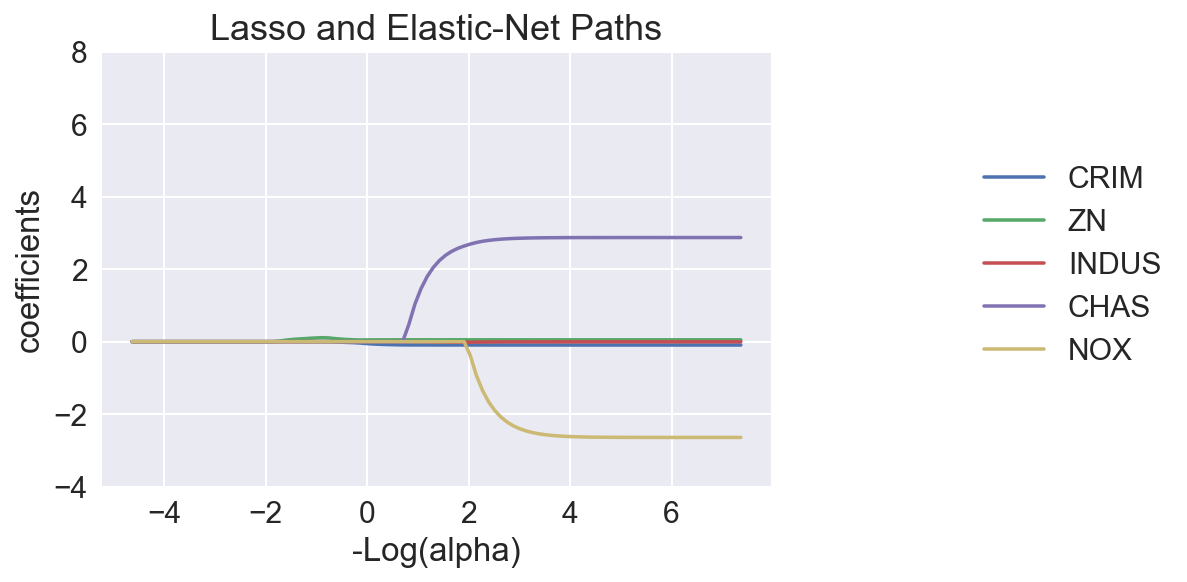

In [157]:
#plt.figure(1)
#ax = plt.gca()
#ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
for i in range(0, 5):
    plt.plot(-np.log10(alphas_lasso), coefs_lasso.T[:,i], label=X_cname[i])
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.ylim(-4,8)
plt.show()

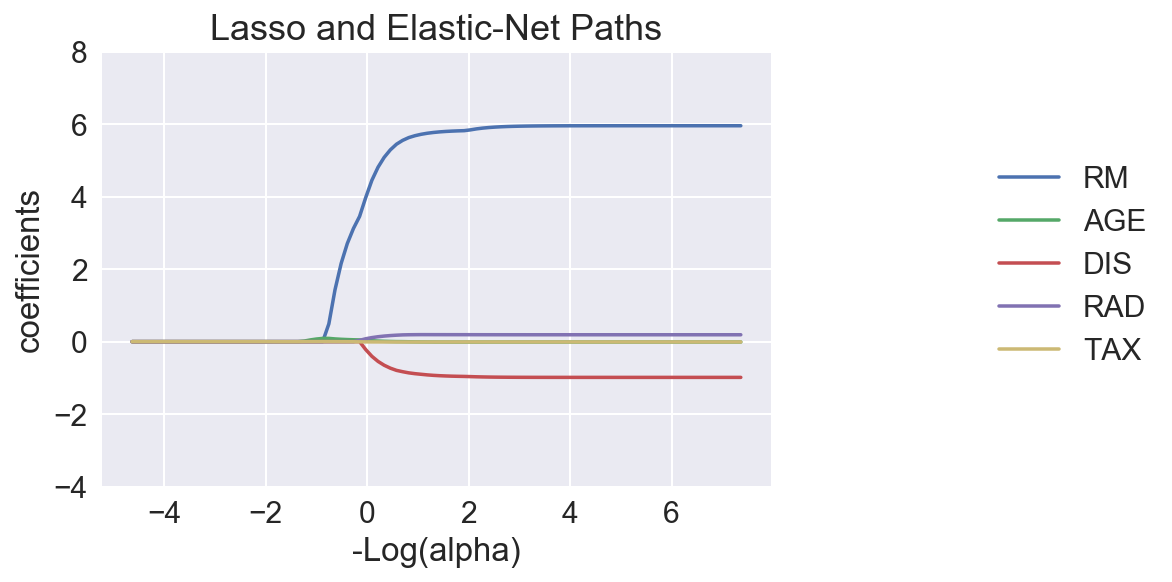

In [158]:
plt.figure(1)
ax = plt.gca()
#ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
for i in range(5, 10):
    plt.plot(-np.log10(alphas_lasso), coefs_lasso.T[:,i], label=X_cname[i])
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.ylim(-4,8)
plt.show()


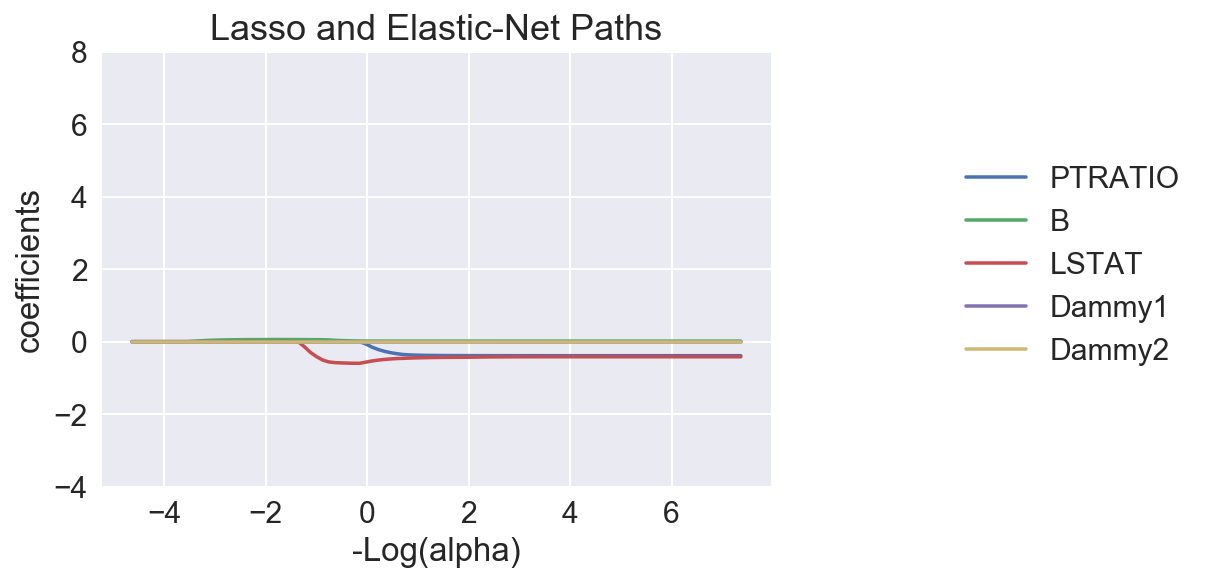

In [159]:
plt.figure(1)
ax = plt.gca()
#ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
for i in range(10, 15):
    plt.plot(-np.log10(alphas_lasso), coefs_lasso.T[:,i], label=X_cname[i])
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.ylim(-4,8)
plt.show()

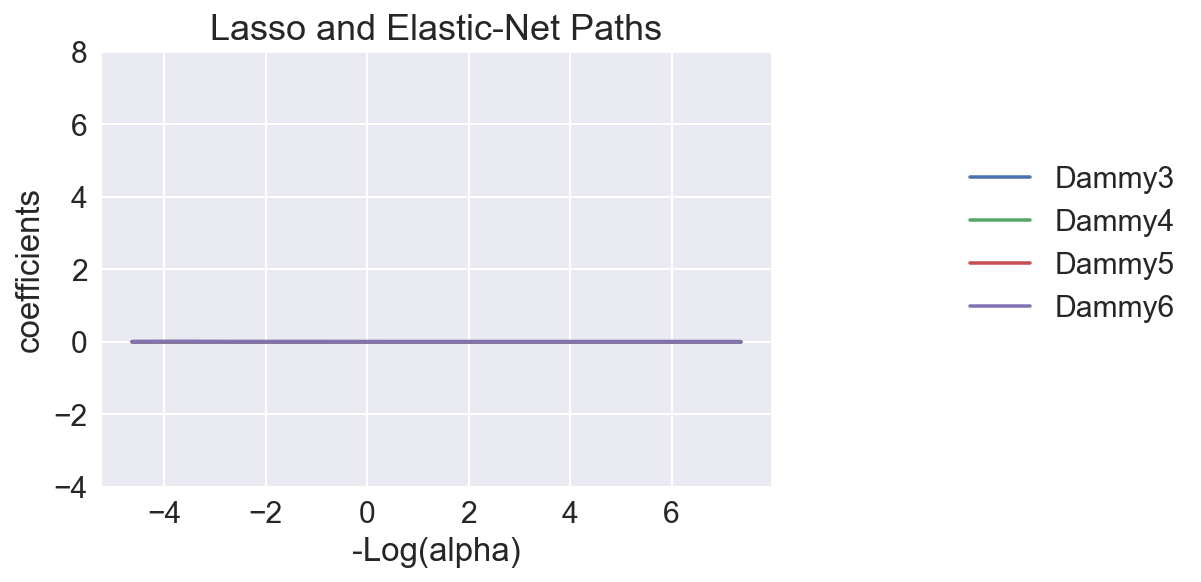

In [160]:
plt.figure(1)
ax = plt.gca()
#ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
for i in range(15, 19):
    plt.plot(-np.log10(alphas_lasso), coefs_lasso.T[:,i], label=X_cname[i])
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.ylim(-4,8)
plt.show()


In [56]:
np.shape(coefs_lasso.T)

(100, 19)

In [57]:
np.shape(alphas_lasso)

(100,)

In [94]:
coefs_lasso.T[98:100,:]

array([[ -9.36482382e-02,   5.03262329e-02,  -4.68630065e-03,
          2.87251784e+00,  -2.64354272e+00,   5.95748688e+00,
         -9.90152775e-03,  -9.86271455e-01,   1.90041461e-01,
         -8.65874445e-03,  -3.87436071e-01,   1.49504929e-02,
         -4.17732865e-01,  -0.00000000e+00,  -0.00000000e+00,
         -0.00000000e+00,   1.73580466e-11,  -2.09626014e-04,
         -2.11168117e-04],
       [ -9.36482394e-02,   5.03262324e-02,  -4.68628554e-03,
          2.87251811e+00,  -2.64354610e+00,   5.95748705e+00,
         -9.90152486e-03,  -9.86271487e-01,   1.90041458e-01,
         -8.65874376e-03,  -3.87436073e-01,   1.49504931e-02,
         -4.17732847e-01,  -0.00000000e+00,  -0.00000000e+00,
         -0.00000000e+00,   1.31286875e-11,  -2.09625989e-04,
         -2.11168119e-04]])

In [117]:
X_cname[0]

'CRIM'

In [128]:
print(range(5, 10))

range(5, 10)
